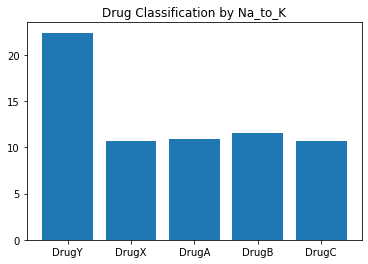

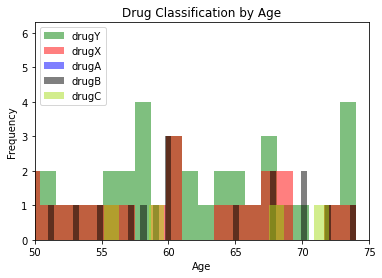

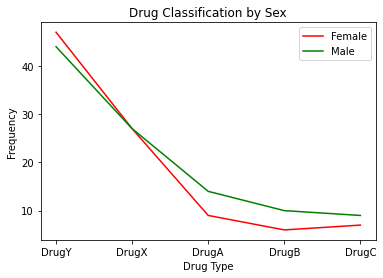

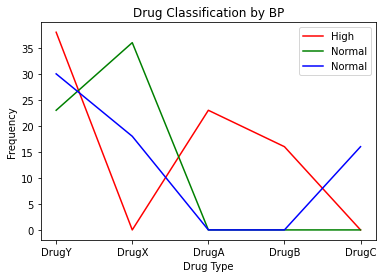

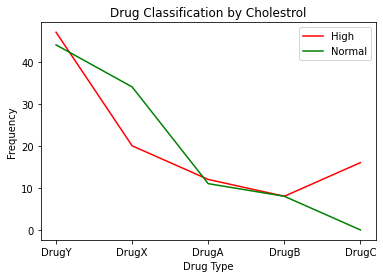

In [9]:
# Task 1, 2 and 3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

drugList = pd.read_csv("drug200.csv")

## Spliting into 5 groups
drugY = drugList.loc[drugList['Drug'] == "drugY"]
drugX = drugList.loc[drugList['Drug'] == "drugX"]
drugA = drugList.loc[drugList['Drug'] == "drugA"]
drugB = drugList.loc[drugList['Drug'] == "drugB"]
drugC = drugList.loc[drugList['Drug'] == "drugC"]


# Na_To_K
xAxis = ["DrugY", "DrugX", "DrugA", "DrugB", "DrugC"]
yAxis = [drugY['Na_to_K'].mean(), drugX['Na_to_K'].mean(), drugA['Na_to_K'].mean(), drugB['Na_to_K'].mean(), drugC['Na_to_K'].mean()]

fig1 = plt.figure(1)

plt.bar(xAxis, yAxis)

plt.title("Drug Classification by Na_to_K")

fig2 = plt.figure(2)

# Visualize Drug Y by Age
drugY_Age = drugList.loc[drugList['Drug']=='drugY', 'Age']
drugX_Age = drugList.loc[drugList['Drug']=='drugX', 'Age']
drugA_Age = drugList.loc[drugList['Drug']=='drugA', 'Age']
drugB_Age = drugList.loc[drugList['Drug']=='drugB', 'Age']
drugC_Age = drugList.loc[drugList['Drug']=='drugC', 'Age']

kwargs = dict(alpha=0.5, bins=50)

plt.hist(drugY_Age, **kwargs, color='g', label='drugY')
plt.hist(drugX_Age, **kwargs, color='r', label='drugX')
plt.hist(drugA_Age, **kwargs, color='b', label='drugA')
plt.hist(drugB_Age, **kwargs, color='k', label='drugB')
plt.hist(drugC_Age, **kwargs, color='#a7dd1c', label='drugC')
plt.xlim(50,75)
plt.legend()

plt.title("Drug Classification by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Sex
fig3 = plt.figure(3)

yAxis = [len(drugY[drugY.Sex == 'F']), len(drugX[drugX.Sex == 'F']), len(drugA[drugA.Sex == 'F']), len(drugB[drugB.Sex == 'F']), len(drugC[drugC.Sex == 'F'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'Female')

yAxis = [len(drugY[drugY.Sex == 'M']), len(drugX[drugX.Sex == 'M']), len(drugA[drugA.Sex == 'M']), len(drugB[drugB.Sex == 'M']), len(drugC[drugC.Sex == 'M'])]

plt.plot(xAxis, yAxis, color='g', label = 'Male')

plt.title("Drug Classification by Sex")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

# BP
fig4 = plt.figure(4)

yAxis = [len(drugY[drugY.BP == 'HIGH']), len(drugX[drugX.BP == 'HIGH']), len(drugA[drugA.BP == 'HIGH']), len(drugB[drugB.BP == 'HIGH']), len(drugC[drugC.BP == 'HIGH'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'High')

yAxis = [len(drugY[drugY.BP == 'NORMAL']), len(drugX[drugX.BP == 'NORMAL']), len(drugA[drugA.BP == 'NORMAL']), len(drugB[drugB.BP == 'NORMAL']), len(drugC[drugC.BP == 'NORMAL'])]

plt.plot(xAxis, yAxis, color='g', label = 'Normal')

yAxis = [len(drugY[drugY.BP == 'LOW']), len(drugX[drugX.BP == 'LOW']), len(drugA[drugA.BP == 'LOW']), len(drugB[drugB.BP == 'LOW']), len(drugC[drugC.BP == 'LOW'])]

plt.plot(xAxis, yAxis, color='b', label = 'Normal')

plt.title("Drug Classification by BP")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

# Cholestrol 
fig5 = plt.figure(5)

yAxis = [len(drugY[drugY.Cholesterol == 'HIGH']), len(drugX[drugX.Cholesterol == 'HIGH']), len(drugA[drugA.Cholesterol == 'HIGH']), len(drugB[drugB.Cholesterol == 'HIGH']), len(drugC[drugC.Cholesterol == 'HIGH'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'High')

yAxis = [len(drugY[drugY.Cholesterol == 'NORMAL']), len(drugX[drugX.Cholesterol == 'NORMAL']), len(drugA[drugA.Cholesterol == 'NORMAL']), len(drugB[drugB.Cholesterol == 'NORMAL']), len(drugC[drugC.Cholesterol == 'NORMAL'])]

plt.plot(xAxis, yAxis, color='g', label = 'Normal')

plt.title("Drug Classification by Cholestrol")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

## Saving
pdf = PdfPages("drugClassification.pdf")
fig_nums = plt.get_fignums()
figs = [plt.figure(n) for n in fig_nums]
for fig in figs:
    fig.savefig(pdf, format='pdf')
pdf.close()

In [10]:
# Task 4 and 5
import sklearn.model_selection as model_selection
import pandas as pd
import numpy as np

drugList = pd.read_csv("drug200.csv")
drugList.BP = pd.Categorical(drugList.BP, ['LOW', 'NORMAL', 'HIGH'], ordered=True)
drugList.BP = drugList.BP.cat.codes
# drugList.BP = pd.get_dummies(drugList.BP, ['LOW', 'NORMAL', 'HIGH'])
drugList.Cholesterol = pd.Categorical(drugList.Cholesterol, ['NORMAL', 'HIGH'], ordered=True)
drugList.Cholesterol = drugList.Cholesterol.cat.codes
# drugList.Cholesterol = pd.get_dummies(drugList.Cholesterol, ['NORMAL', 'HIGH'])
drugList.Sex = pd.get_dummies(drugList.Sex, ['F', 'M'])

print(drugList)

# X = data, Y = labels of data
X = drugList[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y = drugList['Drug']

# Use X_train and Y_train to train, then test model on X_test and Y_test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  drugY
1     47    0   0            1   13.093  drugC
2     47    0   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    0   0            1   12.006  drugC
197   52    0   1            1    9.894  drugX
198   23    0   1            0   14.020  drugX
199   40    1   0            0   11.349  drugX

[200 rows x 6 columns]


In [20]:
# Task 6
# a) Gaussian NB

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

accu = []
avg = []
weighted = []

for i in range(10):
  GaussB = GaussianNB()
  GaussB.fit(X_train, Y_train)

  Y_expect = Y_test
  Y_predict = GaussB.predict(X_test)

  acc = accuracy_score(Y_test, Y_predict) * 100
  f1_avg = f1_score(Y_test, Y_predict, average='macro')
  f1_weighted = f1_score(Y_test, Y_predict, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predict)

  matrix = confusion_matrix(Y_test, Y_predict)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)
print(matrix)

[92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0]
[0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942]
[0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588, 0.9252941176470588]
Accuracy Average:  92.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  0.926470588235294
F1 Macro Standard deviation:  1.1102230246251565e-16
F1 Weighted Average:  0.9252941176470589
F1 Weighted Standard deviation:  1.1102230246251565e-16
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       0.60      1.00      0.75         6
       drugX       1.00      1.00      1.00        11
       drugY       1.

In [12]:
 # Task 6
# b) Base-Decision-Tree

from sklearn.tree import DecisionTreeClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()
  DTClassifier.fit(X_train, Y_train)

  Y_predicted = DTClassifier.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)
print(matrix)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Average:  100.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  1.0
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  1.0
F1 Weighted Standard deviation:  0.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[ 9  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 19]]


In [13]:
# Task 6
# c) Top-Decision-Tree

from sklearn.model_selection import GridSearchCV
accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()

  params = {
      "criterion": ["gini", "entropy"],
      "max_depth": [5,15],
      "min_samples_split": [2,7,15]
  }

  clf = GridSearchCV(DTClassifier, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)
print(matrix)

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Average:  100.0
Ac

In [14]:
# Task 6
# d) Perceptron

from sklearn.linear_model import Perceptron
print("Training Perceptron:\n")

accu = []
avg = []
weighted = []

for i in range(10):
  clf = Perceptron()
  clf.fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)
print(matrix)

Training Perceptron:

[44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
[0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123, 0.2868659137705123]
[0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186, 0.40423285705372186]
Accuracy Average:  44.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  0.2868659137705123
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  0.40423285705372186
F1 Weighted Standard deviation:  0.0
              precision    recall  f1-score   support

       drugA       1.00      0.22      0.36         9
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         6
       drugX       0.28      0.91      0.43        11
       drugY       0.83  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [15]:
# Task 6
# e) Base-MLP
from sklearn.neural_network import MLPClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd').fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)
print(matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

[50.0, 48.0, 48.0, 50.0, 48.0, 48.0, 50.0, 48.0, 48.0, 48.0]
[0.23772819472616633, 0.22417582417582418, 0.22417582417582418, 0.23772819472616633, 0.22417582417582418, 0.22417582417582418, 0.23772819472616633, 0.22417582417582418, 0.22417582417582418, 0.22417582417582418]
[0.37444219066937123, 0.35736263736263735, 0.35736263736263735, 0.37444219066937123, 0.35736263736263735, 0.35736263736263735, 0.37444219066937123, 0.35736263736263735, 0.35736263736263735, 0.35736263736263735]
Accuracy Average:  48.6
Accuracy Standard deviation:  0.9165151389911679
F1 Macro Average:  0.22824153534092684
F1 Macro Standard deviation:  0.00621047638930332
F1 Weighted Average:  0.36248650335465754
F1 Weighted Standard deviation:  0.007826834586414134
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         9
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         6
       drugX       0.35      0.55      0.4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

params = {
    "activation": ["logistic", "tanh", "relu", "identity"],
    "hidden_layer_sizes": [(30, 50), (10, 10, 10)],
    "solver": ["adam","sgd"]
}

accu = []
avg = []
weighted = []

for i in range(10):
  clf = GridSearchCV(mlp, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)
  report = classification_report(Y_test, Y_predicted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)
print(matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
[60.0, 80.0, 84.0, 68.0, 82.0, 80.0, 82.0, 84.0, 82.0, 80.0]
[0.2967418546365915, 0.6785296574770259, 0.7466580866580866, 0.5047203765227021, 0.6894965553789083, 0.6744444444444445, 0.6776218323586745, 0.7466580866580866, 0.7236813186813187, 0.6447743289848552]
[0.47117794486215536, 0.7576106934001672, 0.8168725868725869, 0.5880163344407531, 0.7804748277689455, 0.7552222222222222, 0.7694892787524367, 0.8168725868725869, 0.7983754578754578, 0.751464987254461]
Accuracy Average:  78.2
Accuracy Standard deviation:  7.45385806143369
F1 Macro Average:  0.6383326541800695
F1 Macro Standard deviation:  0.1313059207351545
F1 Weighted Average:  0.7305576920321772
F1 Weighted Standard deviation:  0.10624517456493286
              precision    recall  f1-score   support

       drugA       0.80      0.89      0.84         9
       drugB       0.75      0.60      0.67         5
       drugC       0.00      0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
